In [96]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import re

In [97]:
# Turkish Stopwords
with open('turkce-stop-words.txt') as file:  
    stw = file.read() 
stw = stw.split()
stw = [s.lower() for s in stw] 
stw[:5]

['a', 'acaba', 'altı', 'altmış', 'ama']

In [98]:
from snowballstemmer import stemmer
kokbul1 = stemmer('turkish')

In [99]:
f = open('deneme.txt', 'r', encoding='utf8')
text = f.read()
t_list = text.split('\n')

corpus = []

for metin in t_list:
    metin = re.sub(r'[^\w\s]','',metin)
    kelimeler = [kelime.lower() for kelime in kokbul1.stemWords(metin.split()) if kelime not in stw]
    corpus.append(kelimeler)

In [100]:
corpus

[['yıldız', 'gezege', 'uzay', 'araç', 'dünya'],
 ['eee', 'rrrr', 'tttt', 'evre', 'yyy', 'oooo', 'hhhh'],
 ['dünya', 'atmosfer', 'dış', 'uzay', 'enerji', 'biçim', 'içere', 'büt'],
 ['gök',
  'cisim',
  'ara',
  'yer',
  'ala',
  'evre',
  'ağırlıklı',
  'hidroje',
  'hely',
  'oluşa'],
 ['yıldız', 'gezege', 'evre', 'araç', 'dünya'],
 ['eee', 'rrrr', 'tttt', 'uzay', 'yyy', 'oooo', 'hhhh'],
 ['dünya', 'atmosfer', 'dış', 'evre', 'enerji', 'biçim', 'içere', 'büt'],
 ['gök',
  'cisim',
  'ara',
  'yer',
  'ala',
  'uzay',
  'ağırlıklı',
  'hidroje',
  'hely',
  'oluşa'],
 ['öte', 'evre', 'büyük', 'gökcisim', 'aynı', 'zama'],
 ['öte', 'uzay', 'büyük', 'gökcisim', 'aynı', 'zama'],
 ['baz', 'galaksi', 'evre', 'araç', 'dünya'],
 ['baz', 'galaksi', 'uzay', 'araç', 'dünya'],
 ['ala', 'rrrr', 'içere', 'evre', 'enerji', 'biçim', 'dünya', 'büt'],
 ['ala', 'rrrr', 'içere', 'uzay', 'enerji', 'biçim', 'dünya', 'büt']]

In [101]:
model = Word2Vec(corpus, size=40, window=1, min_count=3, sg=1)

In [102]:
model

In [103]:
model.wv.most_similar('uzay')

[('içere', 0.24752357602119446),
 ('dünya', 0.2307063192129135),
 ('büt', 0.14815442264080048),
 ('evre', 0.12828125059604645),
 ('rrrr', 0.12624122202396393),
 ('enerji', 0.098637655377388),
 ('biçim', 0.08359900861978531),
 ('araç', 0.02110220491886139),
 ('ala', -0.2171531319618225)]

In [104]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,40))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

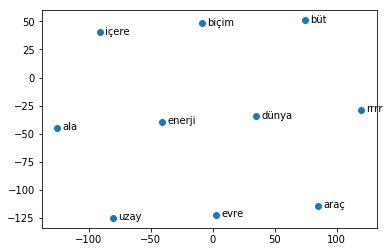

In [105]:
closestwords_tsneplot(model, 'uzay')

In [107]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

In [108]:
model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)

In [115]:
model.vocabulary

In [116]:
sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
model = Word2Vec(min_count=1)
model.build_vocab(sentences) 
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  after removing the cwd from sys.path.


(1, 30)

In [118]:
model.wv.most_similar('cat')

[('meow', 0.024364227429032326),
 ('dog', -0.016982432454824448),
 ('woof', -0.10650789737701416),
 ('say', -0.21089118719100952)]